# Plot main sequence

In this notebook we show how you can load a dataset, compute all the necessary properties and the plot the main sequence.

In [1]:
import pymovements as pm
from pymovements.events.engbert import microsaccades
from pymovements.plotting.main_sequence_plot import main_sequence_plot

First, you have to define your dataset. You can already download and extract all the files.

In [2]:
dataset = pm.datasets.toy_dataset.ToyDataset(root='data/', download=True, extract=True, remove_finished=True)
dataset.load()

pymovements-toy-dataset.zip: 0.00B [00:00, ?B/s]

  0%|          | 0/20 [00:00<?, ?it/s]

Now, you have to convert the raw x and y coordinates in pixels to degrees in visual angel. Then we can convert these positions into velocitites.

In [3]:
# convert raw coordinates in pixels into degrees of visual angle
dataset.pix2deg()

# convert positions into velocities
dataset.pos2vel()

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

As we have the velocities, we can run our microsaccade detection algorithm. We then save the detected events.

In [4]:
dataset.detect_events(microsaccades)
dataset.save_events()

0it [00:00, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

As the next step we compute the event properties 'amplitude' and 'peak velocity' for the detected saccades.

In [5]:
dataset.compute_event_properties(['amplitude', 'peak_velocity'])
dataset.save()

0it [00:00, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

We load the event files which we can then use as input for the plotting function. 

In [6]:
event_dfs = dataset.load_event_files()

  0%|          | 0/20 [00:00<?, ?it/s]

Showing main sequence plot for text 0, page 1:


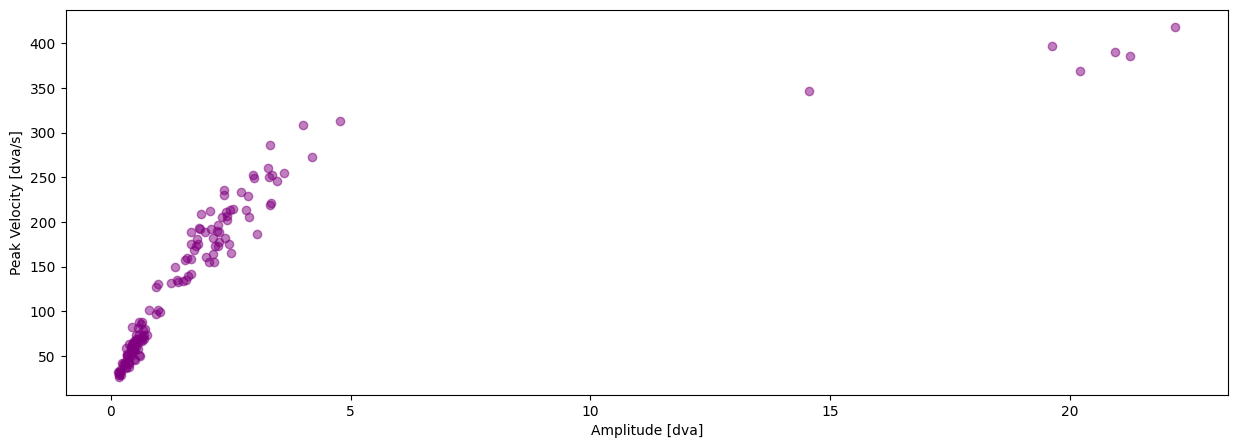

Showing main sequence plot for text 0, page 2:


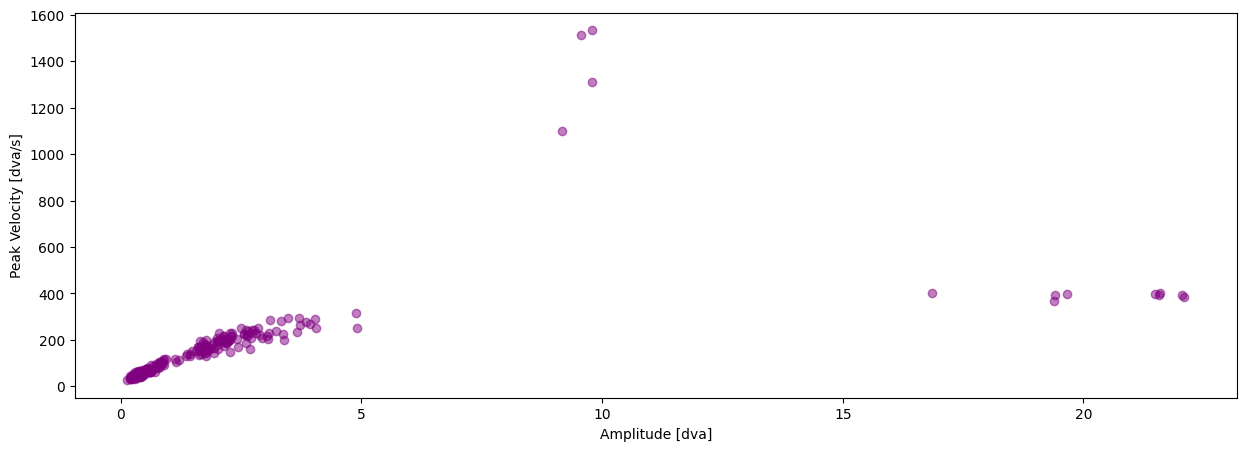

Showing main sequence plot for text 0, page 3:


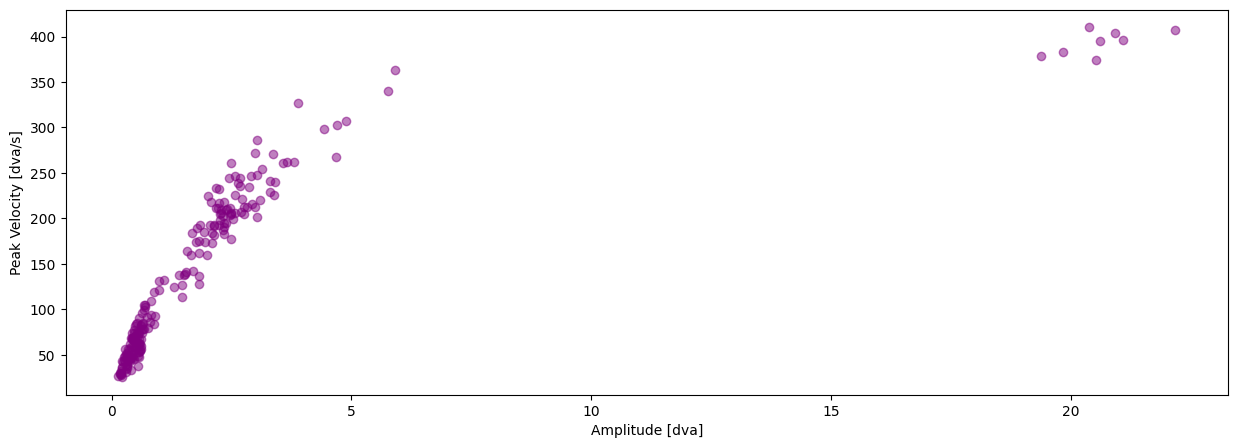

Showing main sequence plot for text 0, page 4:


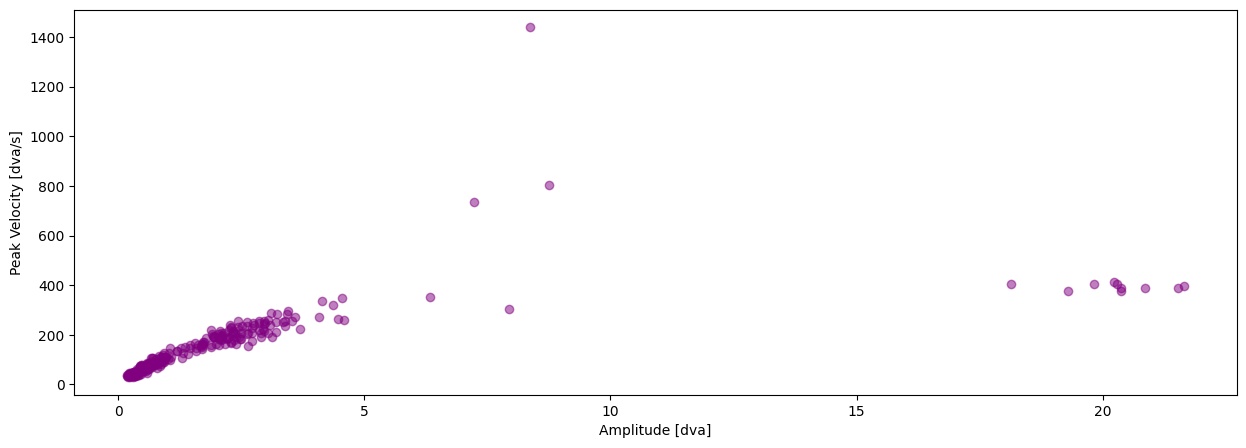

Showing main sequence plot for text 0, page 5:


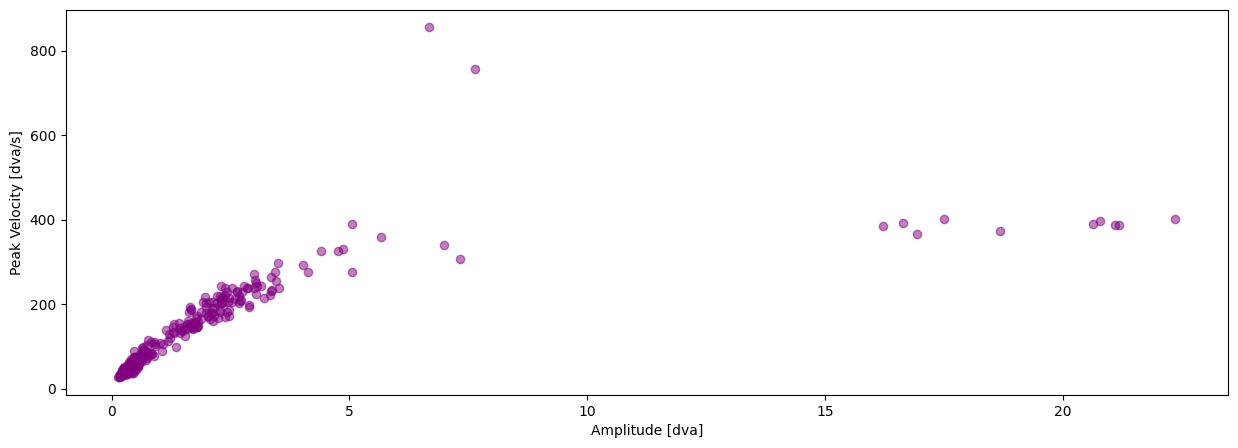

Showing main sequence plot for text 1, page 1:


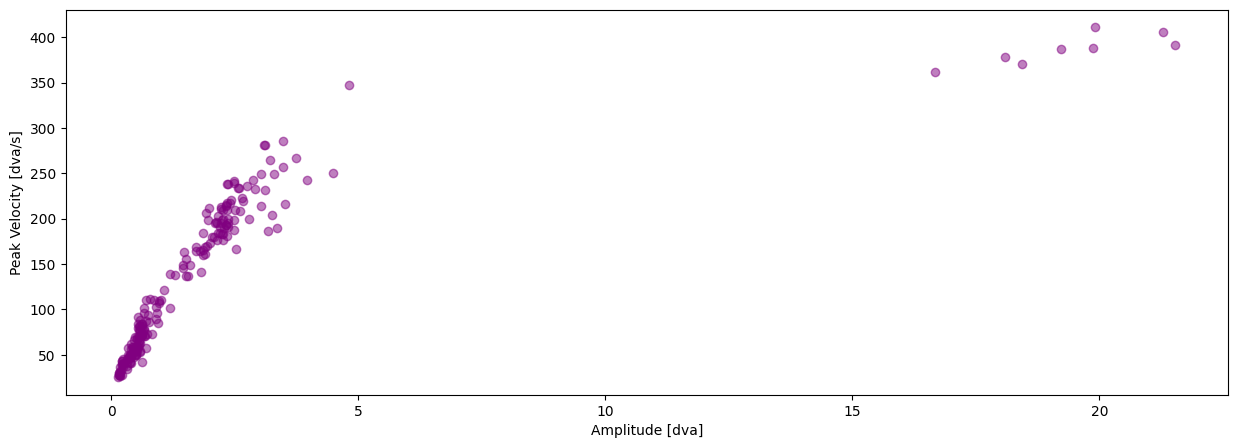

Showing main sequence plot for text 1, page 2:


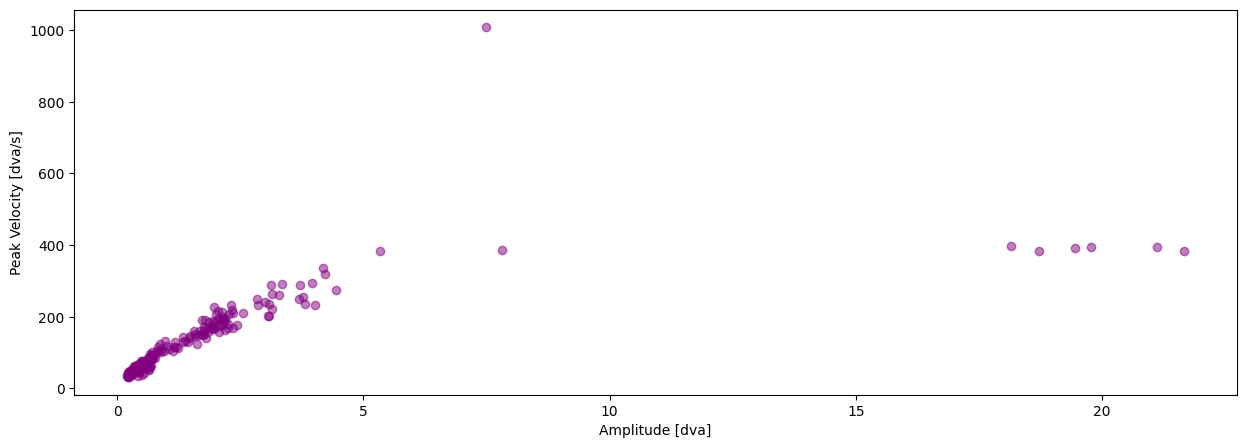

Showing main sequence plot for text 1, page 3:


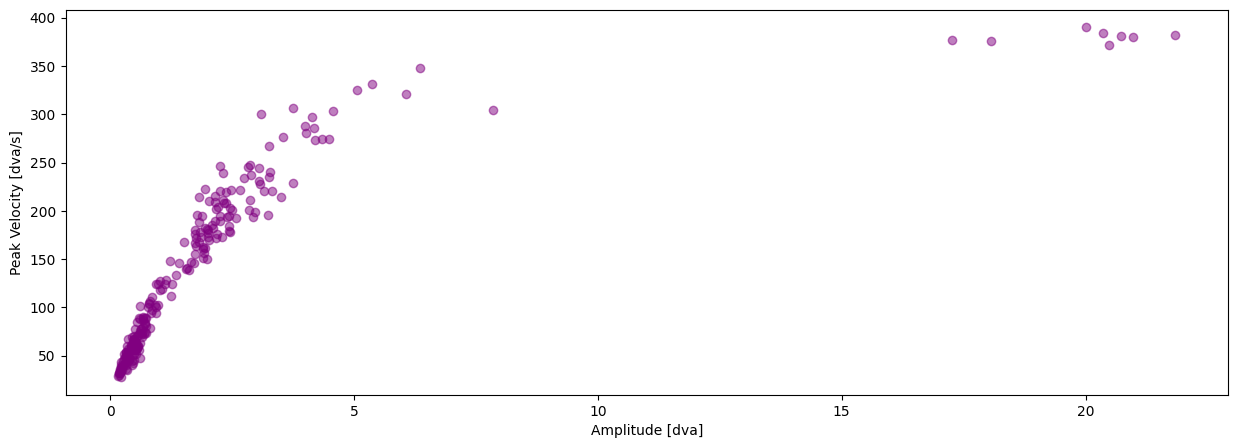

Showing main sequence plot for text 1, page 4:


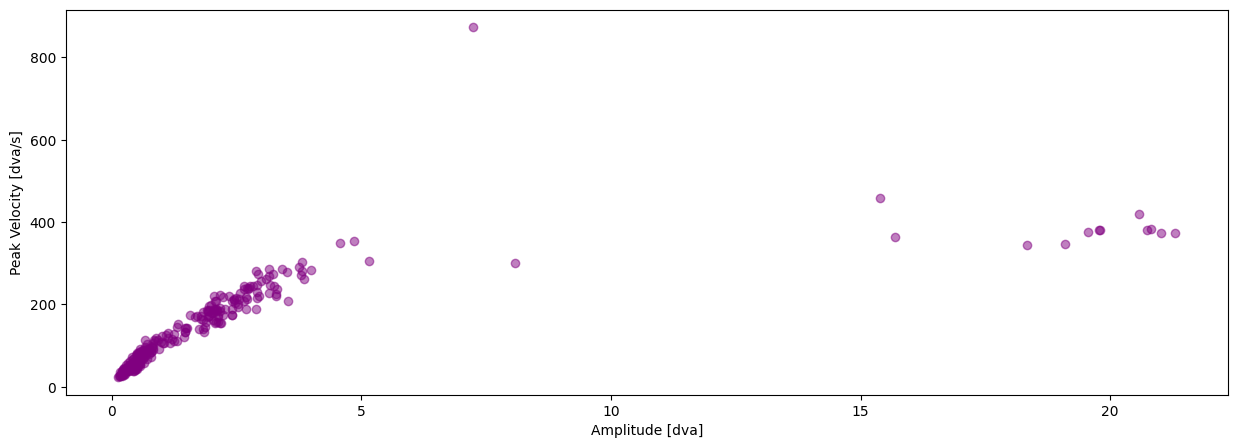

Showing main sequence plot for text 1, page 5:


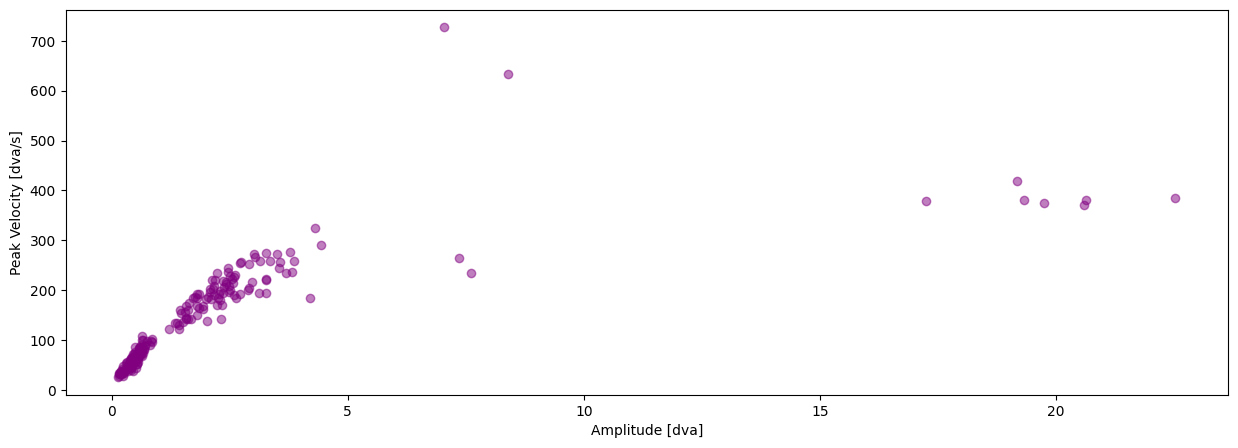

Showing main sequence plot for text 2, page 1:


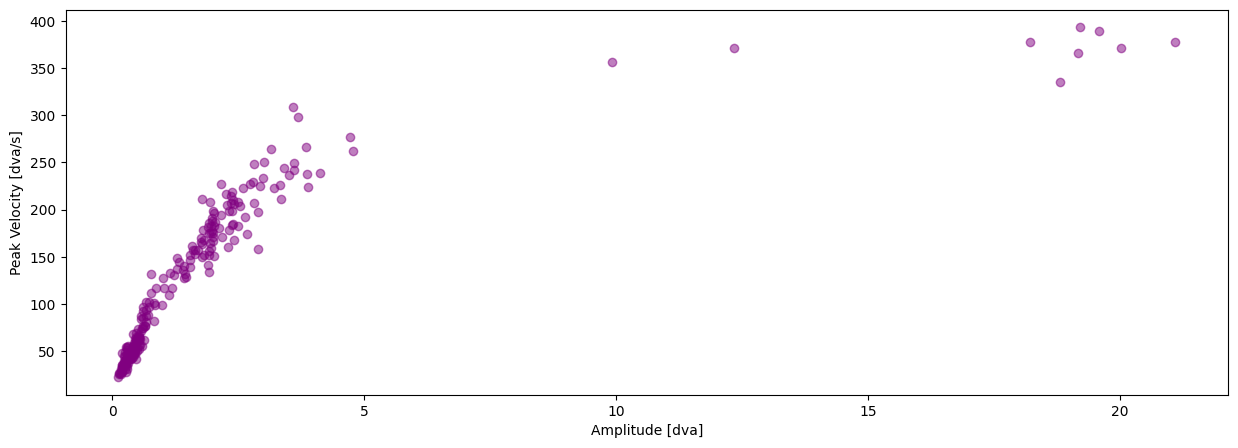

Showing main sequence plot for text 2, page 2:


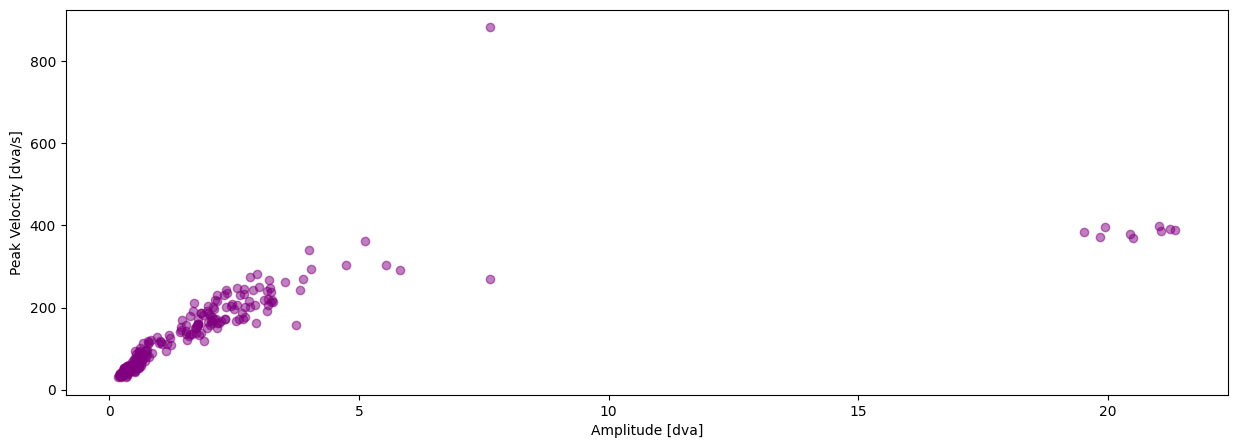

Showing main sequence plot for text 2, page 3:


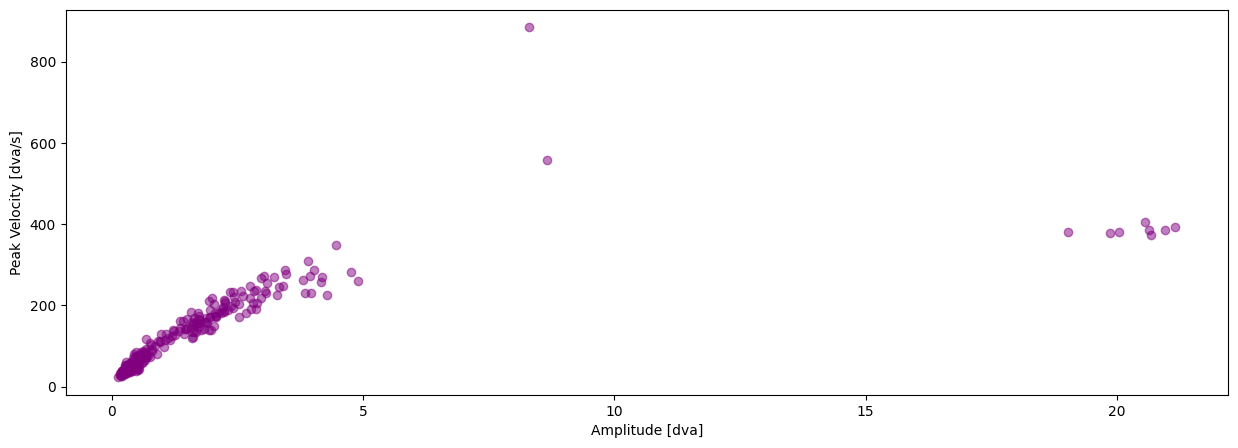

Showing main sequence plot for text 2, page 4:


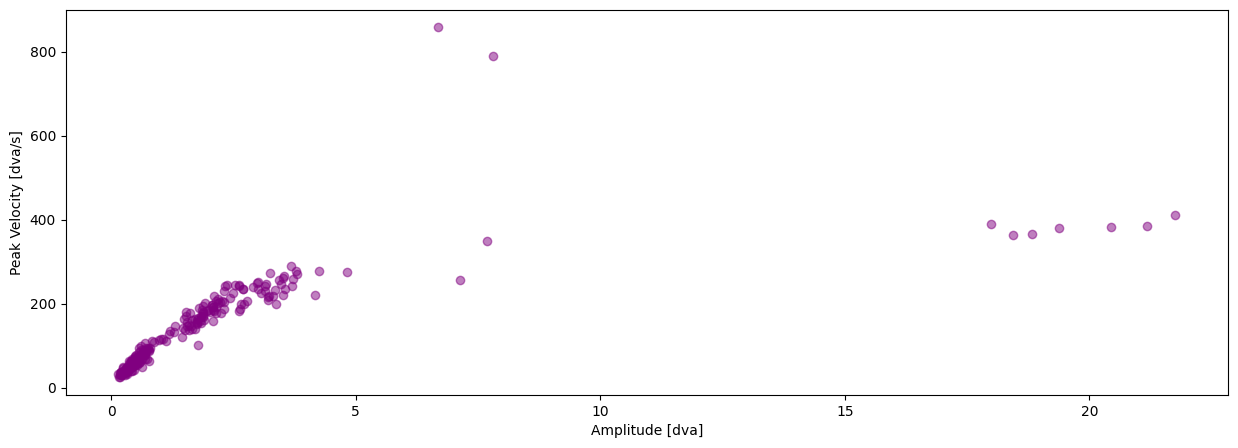

Showing main sequence plot for text 2, page 5:


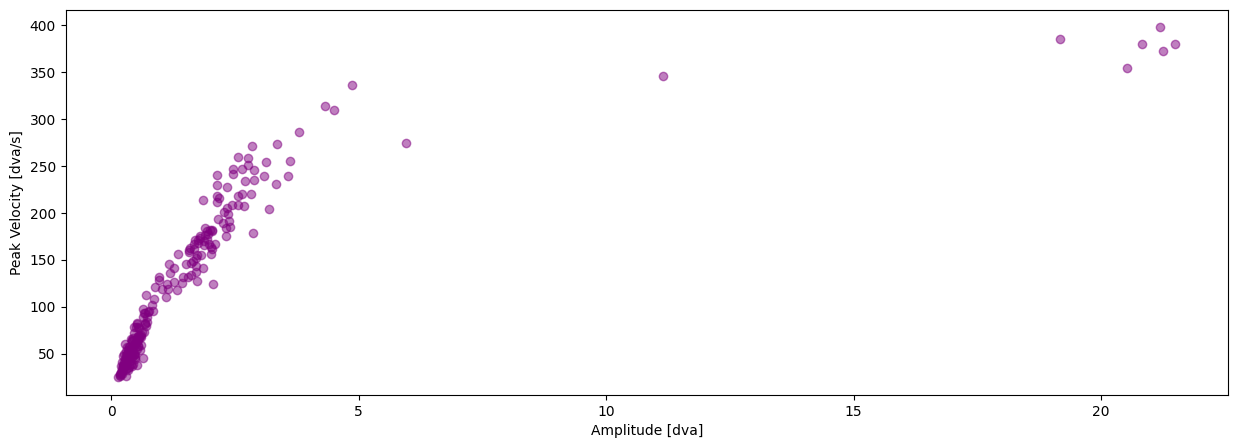

Showing main sequence plot for text 3, page 1:


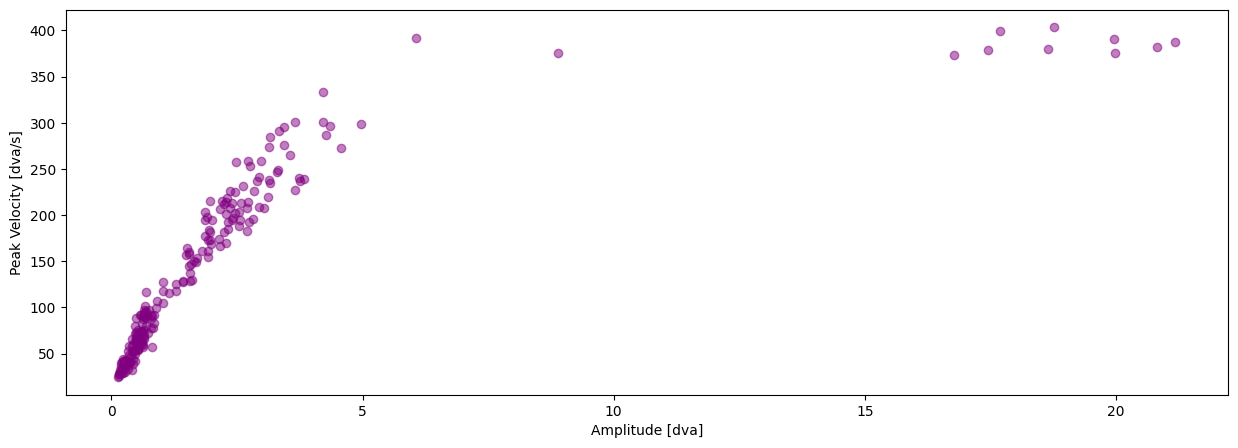

Showing main sequence plot for text 3, page 2:


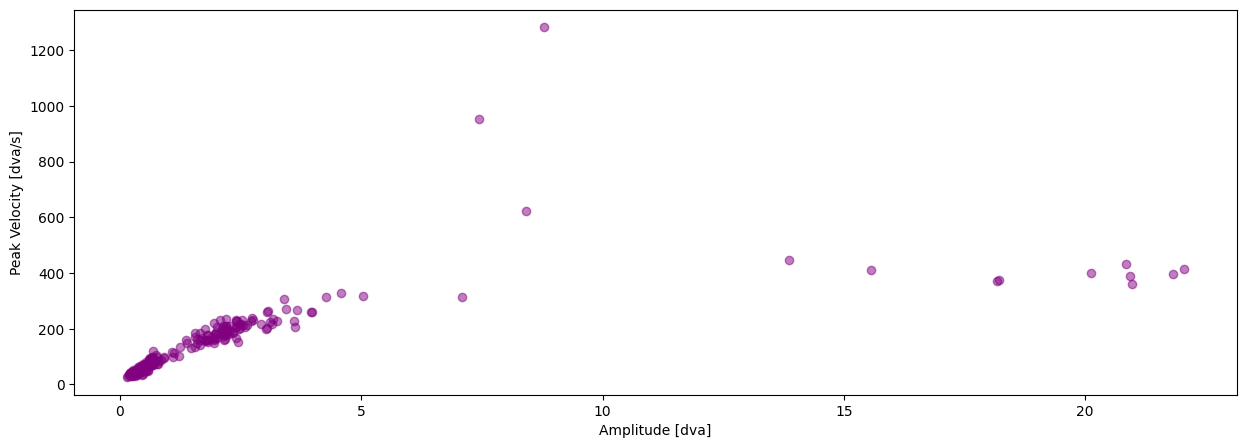

Showing main sequence plot for text 3, page 3:


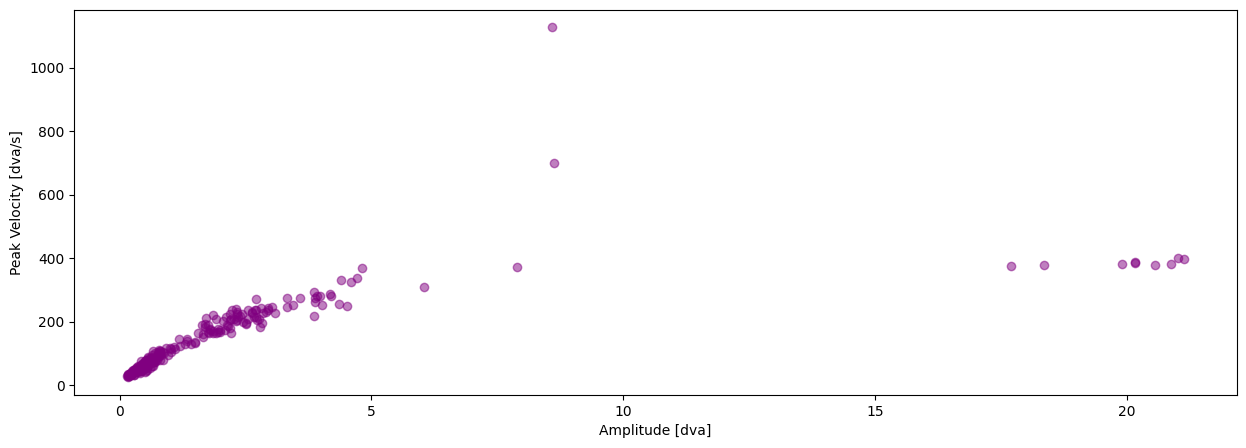

Showing main sequence plot for text 3, page 4:


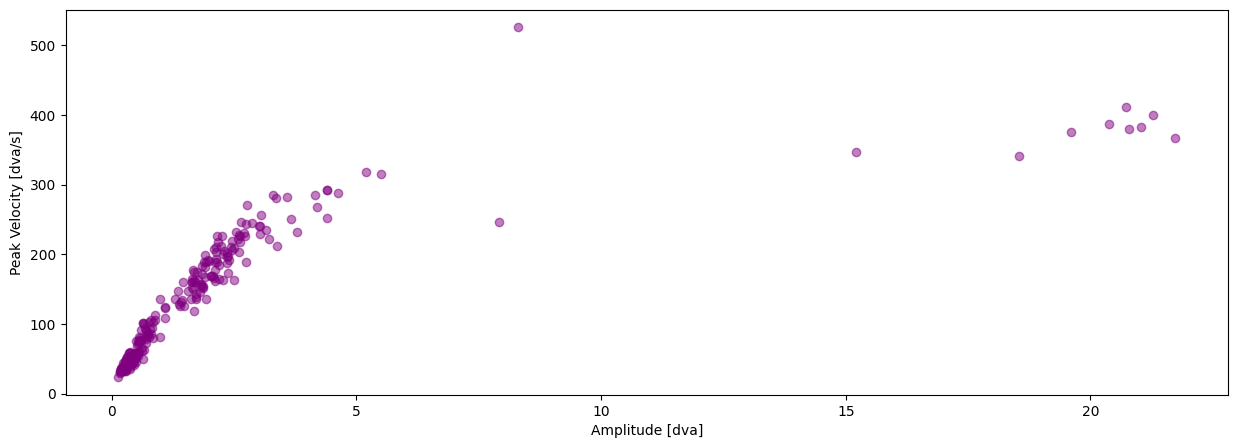

Showing main sequence plot for text 3, page 5:


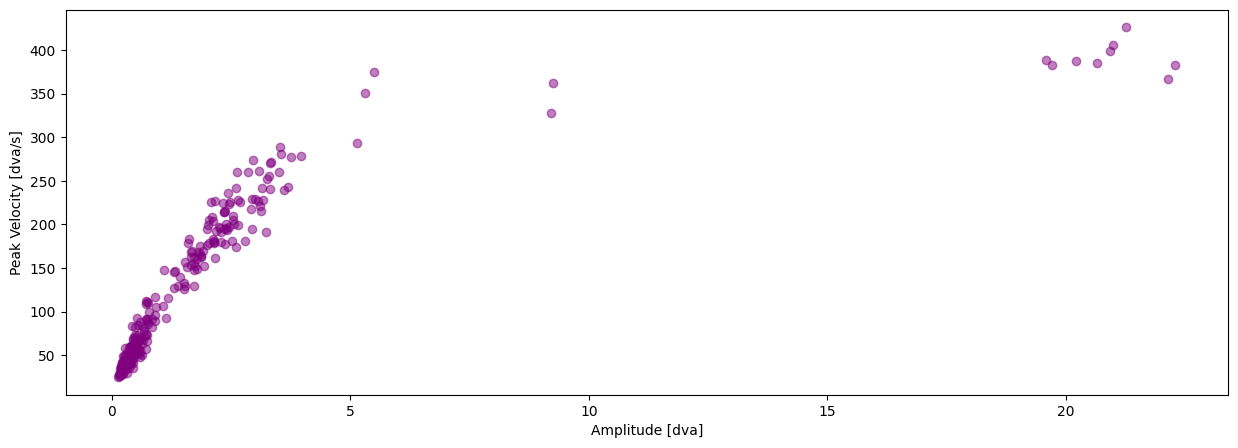

In [8]:
# only showing the first three event dataframes here.
for event_df in event_dfs:
    print(f'Showing main sequence plot for text {event_df[0, "text_id"]}, page {event_df[0, "page_id"]}:')
    main_sequence_plot(event_df)